In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/content/training_data_ht2025.csv')

In [5]:
dataset.head(1)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand


In [6]:
numerical_data= dataset[['hour_of_day', 'day_of_week', 'month', 'temp', 'dew', 'humidity', 'snowdepth', 'cloudcover', 'visibility' ]]
categorical_data= dataset[['holiday', 'weekday', 'summertime', 'summertime', 'snow', 'increase_stock']]

In [7]:
numerical_data.head(2)

,hour_of_day,day_of_week,month,temp,dew,humidity,snowdepth,cloudcover,visibility
0,5,5,1,-7.2,-15.0,53.68,0.0,31.6,16.0
1,21,4,1,-1.3,-12.8,40.97,0.0,85.7,16.0


In [8]:
categorical_data.head(2)

,holiday,weekday,summertime,summertime,snow,increase_stock
0,0,0,0,0,0,low_bike_demand
1,0,1,0,0,0,low_bike_demand


In [9]:
snowsum= dataset['snow'].mean()
print(snowsum)

0.0


In [10]:
dataset= dataset.drop(['snow'], axis=1)

In [11]:
dataset.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,6.710000,43.800000,100.000000,16.000000


In [12]:
dataset.isnull().sum()

,0
hour_of_day,0
day_of_week,0
month,0
holiday,0
weekday,0
summertime,0
temp,0
dew,0
humidity,0
precip,0


In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
y

array(['low_bike_demand', 'low_bike_demand', 'low_bike_demand', ...,
       'low_bike_demand', 'high_bike_demand', 'low_bike_demand'],
      dtype=object)

#Encoding categorical data(target)

In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y= le.fit_transform(y)

In [16]:
y

array([1, 1, 1, ..., 1, 0, 1])

In [17]:
dataset['increase_stock']=y

In [18]:
dataset

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,1
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,1
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,1
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,1
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,1
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,1
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,1
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,0


In [19]:
dataset[dataset['weekday']==0].head(10)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0.0,16.3,31.6,16.0,1
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0.0,19.2,0.0,16.0,1
9,7,5,1,0,0,0,-4.5,-12.2,55.14,0.0,0.0,12.4,24.4,16.0,1
11,23,5,5,0,0,1,13.5,2.1,46.11,0.0,0.0,14.2,0.0,16.0,1
14,8,6,2,0,0,0,3.7,-2.3,65.11,0.0,0.0,11.0,92.9,16.0,1
15,23,6,12,0,0,0,4.5,-6.6,44.44,0.0,0.0,7.1,24.4,16.0,1
17,16,6,12,0,0,0,0.0,-12.8,37.61,0.0,0.0,14.8,0.0,16.0,1
20,14,5,4,0,0,1,17.7,12.9,73.11,0.0,0.0,7.1,100.0,16.0,0
22,0,5,1,0,0,0,12.8,11.3,90.18,0.0,0.0,12.2,99.6,16.0,1
32,10,5,8,0,0,1,24.9,22.1,84.38,0.0,0.0,0.0,76.2,16.0,1


#EDA

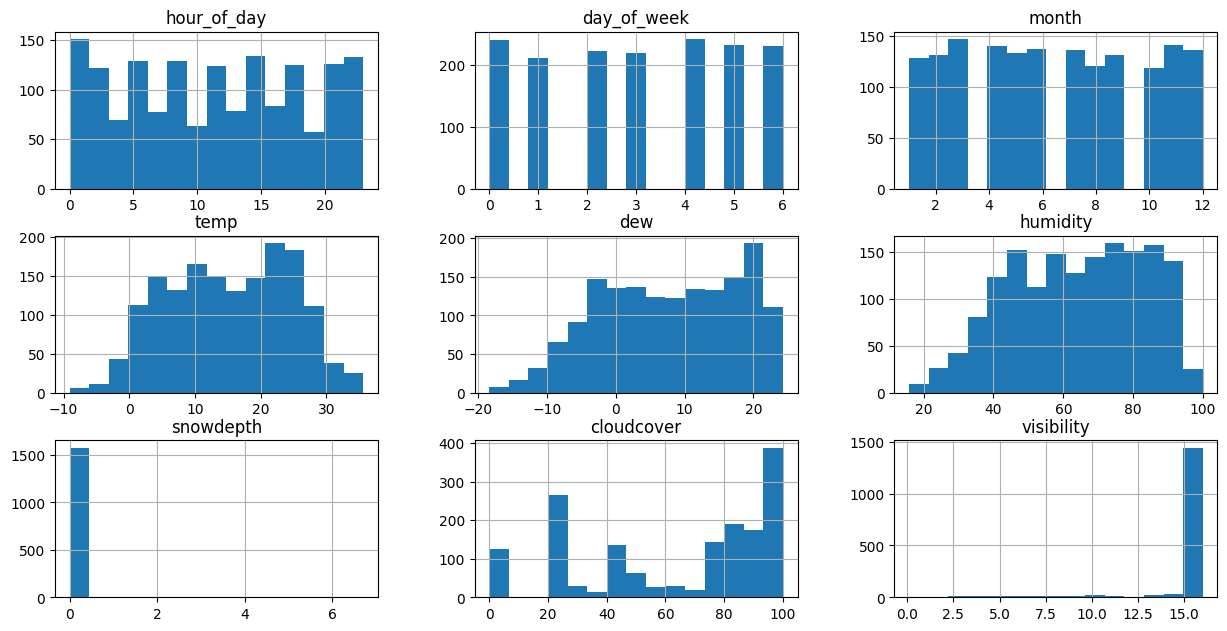

In [20]:
numerical_data.hist(bins=15, figsize=(15,10), layout=(4,3));

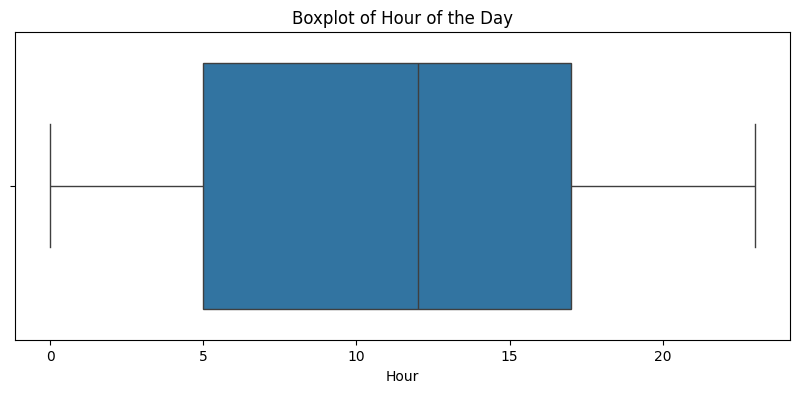

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset["hour_of_day"])
plt.title("Boxplot of Hour of the Day")
plt.xlabel("Hour")
plt.show()

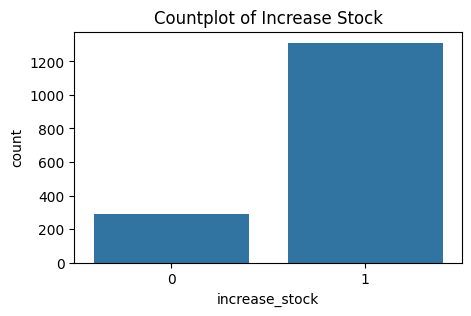

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x=dataset['increase_stock'])
plt.title(f"Countplot of Increase Stock")
plt.show()


In [23]:
hour_group = pd.cut(
    dataset["hour_of_day"],
    bins=[0, 12, 24],
    labels=["0–12", "12–24"],
    right=False
)

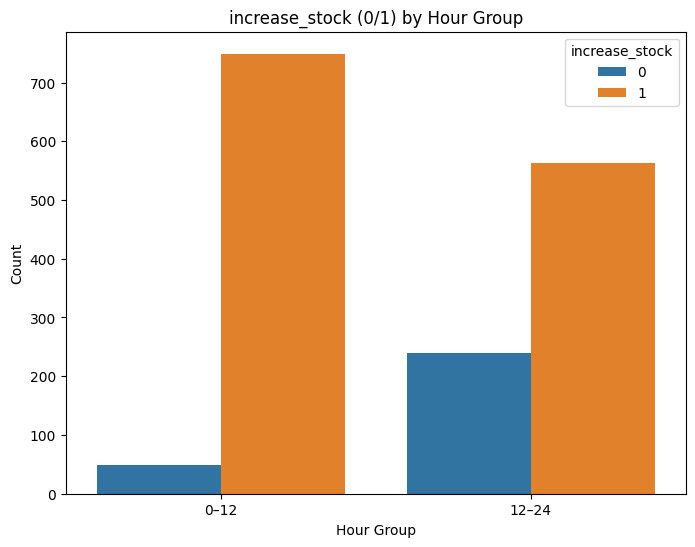

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x=hour_group, hue=dataset["increase_stock"])
plt.xlabel("Hour Group")
plt.ylabel("Count")
plt.title("increase_stock (0/1) by Hour Group")
plt.show()

In [25]:
month_group = pd.cut(
    dataset["month"],
    bins=[1,2,3,4,5,6,7,8,9,10,11,12,13],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "oct", "Nov", "Dec"],
    right=False
)

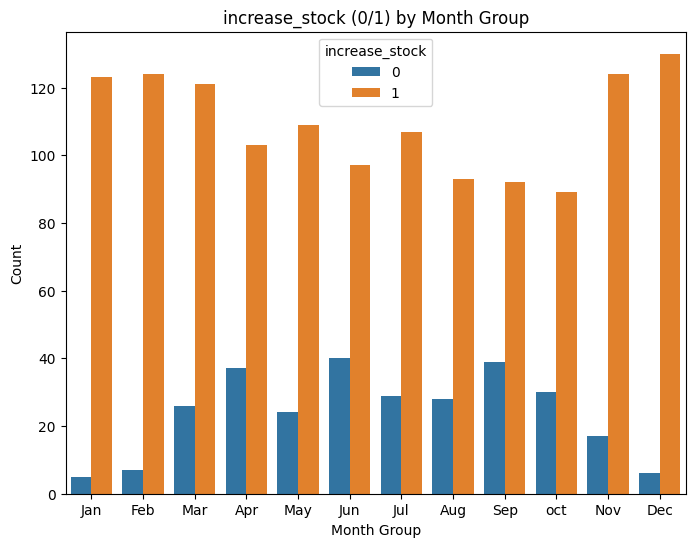

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x=month_group, hue=dataset["increase_stock"])
plt.xlabel("Month Group")
plt.ylabel("Count")
plt.title("increase_stock (0/1) by Month Group")
plt.show()

In [27]:
junedata= dataset[dataset['month']==6]['increase_stock'].count()

In [28]:
print(junedata)

137


In [29]:
weekday_group= pd.cut(
    dataset["weekday"],
    bins=[0,1,2],
    labels=["Weekends", "Weekday"],
    right=False
)

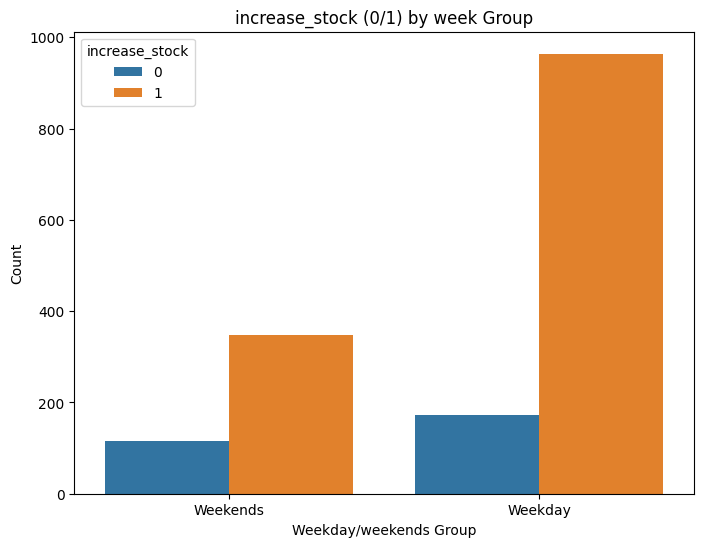

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x=weekday_group, hue=dataset["increase_stock"])
plt.xlabel("Weekday/weekends Group")
plt.ylabel("Count")
plt.title("increase_stock (0/1) by week Group")
plt.show()

In [31]:
day_of_week_group=pd.cut(
    dataset["day_of_week"],
    bins=[0,1,2,3,4,5,6,7],
    labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    right=False
)

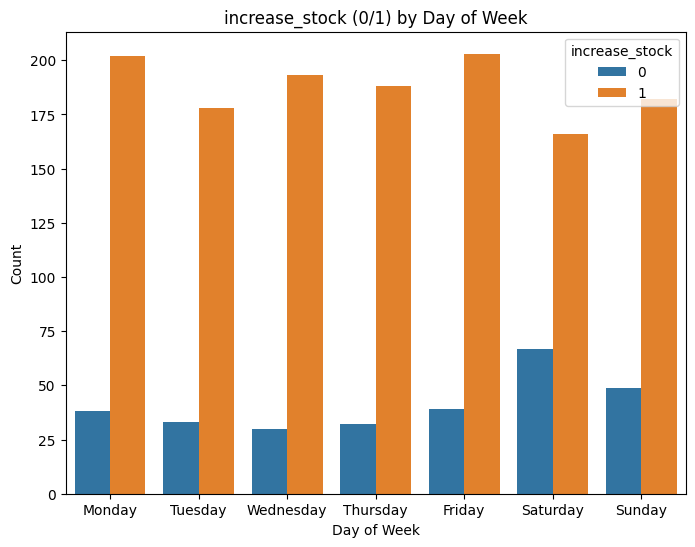

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x=day_of_week_group, hue=dataset["increase_stock"])
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.title("increase_stock (0/1) by Day of Week")
plt.show()

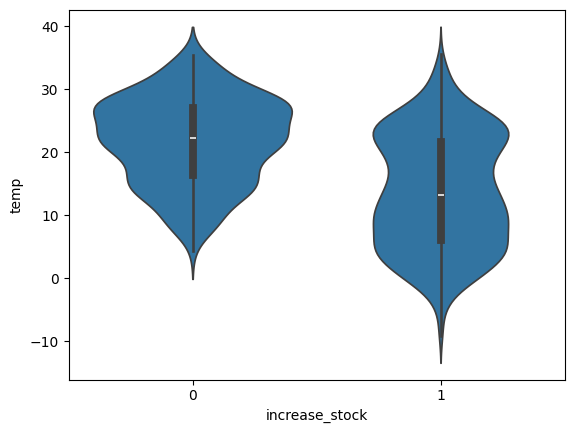

In [33]:
sns.violinplot(x="increase_stock", y="temp", data=dataset)
plt.show()

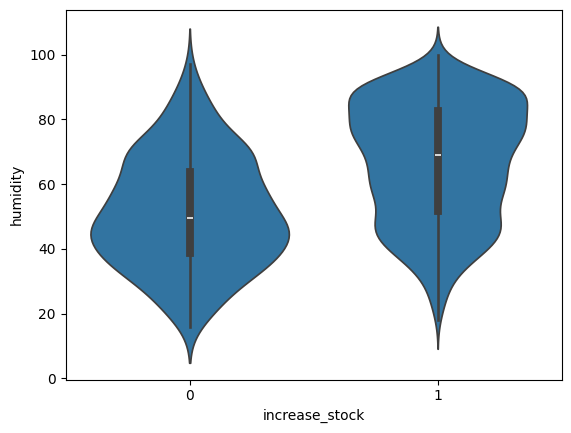

In [34]:
sns.violinplot(x="increase_stock", y="humidity", data=dataset)
plt.show()

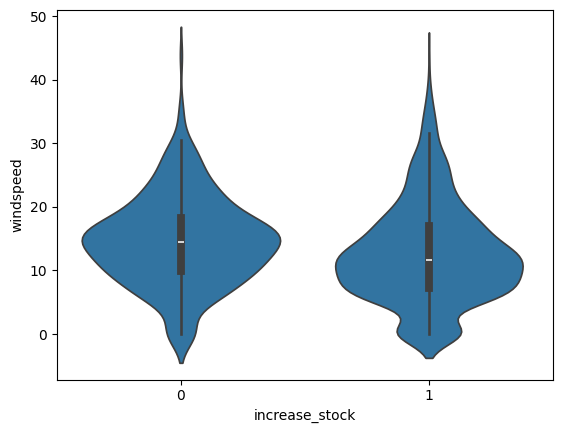

In [35]:
sns.violinplot(x="increase_stock", y="windspeed", data=dataset)
plt.show()

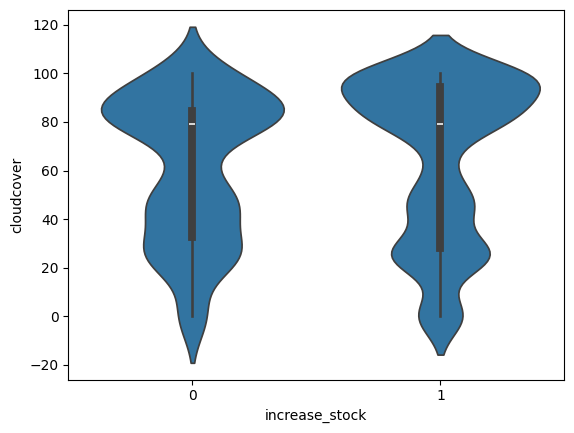

In [36]:
sns.violinplot(x="increase_stock", y="cloudcover", data=dataset)
plt.show()

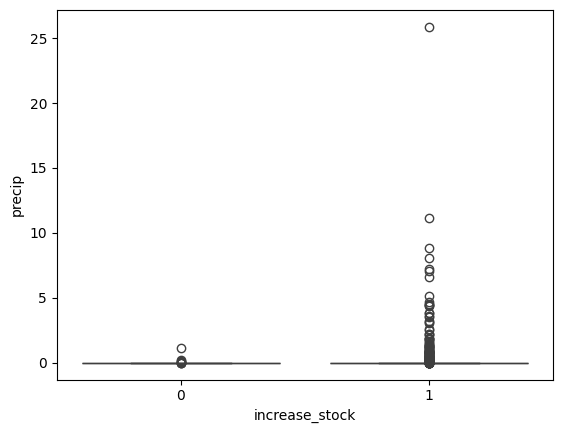

In [37]:
sns.boxplot(x="increase_stock", y="precip", data=dataset)
plt.show()

In [38]:
summertime=pd.cut(
    dataset["summertime"],
    bins=[0,1,2],
    labels=["No", "Yes"],
    right=False
)

Text(0.5, 1.0, 'increase_stock (0/1) by Summertime')

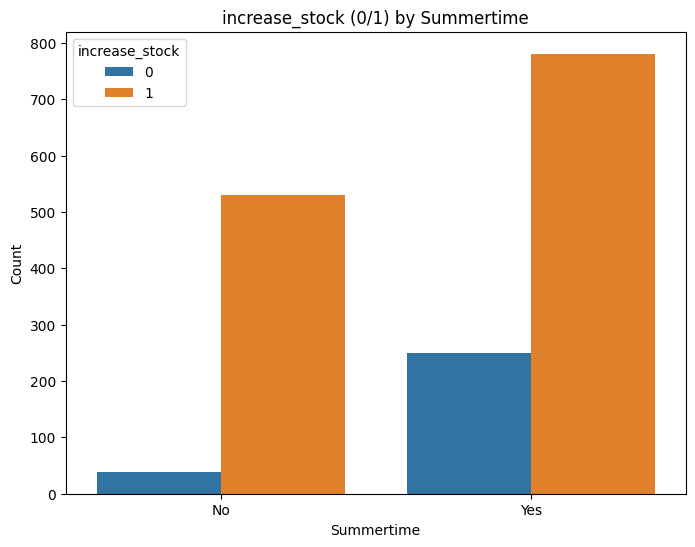

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x=summertime, hue=dataset["increase_stock"])
plt.xlabel("Summertime")
plt.ylabel("Count")
plt.title("increase_stock (0/1) by Summertime")

In [40]:
dataset.corr()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
hour_of_day,1.000000,-0.005963,-0.016503,0.012732,-0.028899,0.005376,0.157994,-0.023067,-0.325988,-0.008747,-0.006031,0.161313,0.002672,0.012115,-0.240544
day_of_week,-0.005963,1.000000,-0.032363,-0.128759,-0.786150,0.010263,0.003727,0.014271,0.016976,-0.011158,-0.045930,0.033726,0.043354,-0.018810,-0.083688
month,-0.016503,-0.032363,1.000000,-0.016021,0.049254,0.046929,0.207436,0.272927,0.173159,0.004232,-0.127751,-0.207056,-0.083544,0.028287,-0.037212
holiday,0.012732,-0.128759,-0.016021,1.000000,0.118294,-0.132132,-0.055069,-0.060239,-0.017260,-0.005564,-0.013385,-0.019129,0.014093,-0.028171,0.004909
weekday,-0.028899,-0.786150,0.049254,0.118294,1.000000,-0.023872,0.007433,0.009804,0.016758,0.029214,0.024333,-0.024126,0.008788,-0.011815,0.116446
summertime,0.005376,0.010263,0.046929,-0.132132,-0.023872,1.000000,0.707637,0.645944,0.064755,0.012930,-0.127991,-0.028827,-0.022964,0.068963,-0.216052
temp,0.157994,0.003727,0.207436,-0.055069,0.007433,0.707637,1.000000,0.871536,0.008306,-0.003313,-0.153692,-0.037656,-0.012421,0.119909,-0.336981
dew,-0.023067,0.014271,0.272927,-0.060239,0.009804,0.645944,0.871536,1.000000,0.489590,0.071566,-0.119660,-0.190793,0.146844,-0.050474,-0.132663
humidity,-0.325988,0.016976,0.173159,-0.017260,0.016758,0.064755,0.008306,0.489590,1.000000,0.174768,0.033598,-0.340557,0.331976,-0.376796,0.308726
precip,-0.008747,-0.011158,0.004232,-0.005564,0.029214,0.012930,-0.003313,0.071566,0.174768,1.000000,0.011242,0.060778,0.126660,-0.455058,0.059304


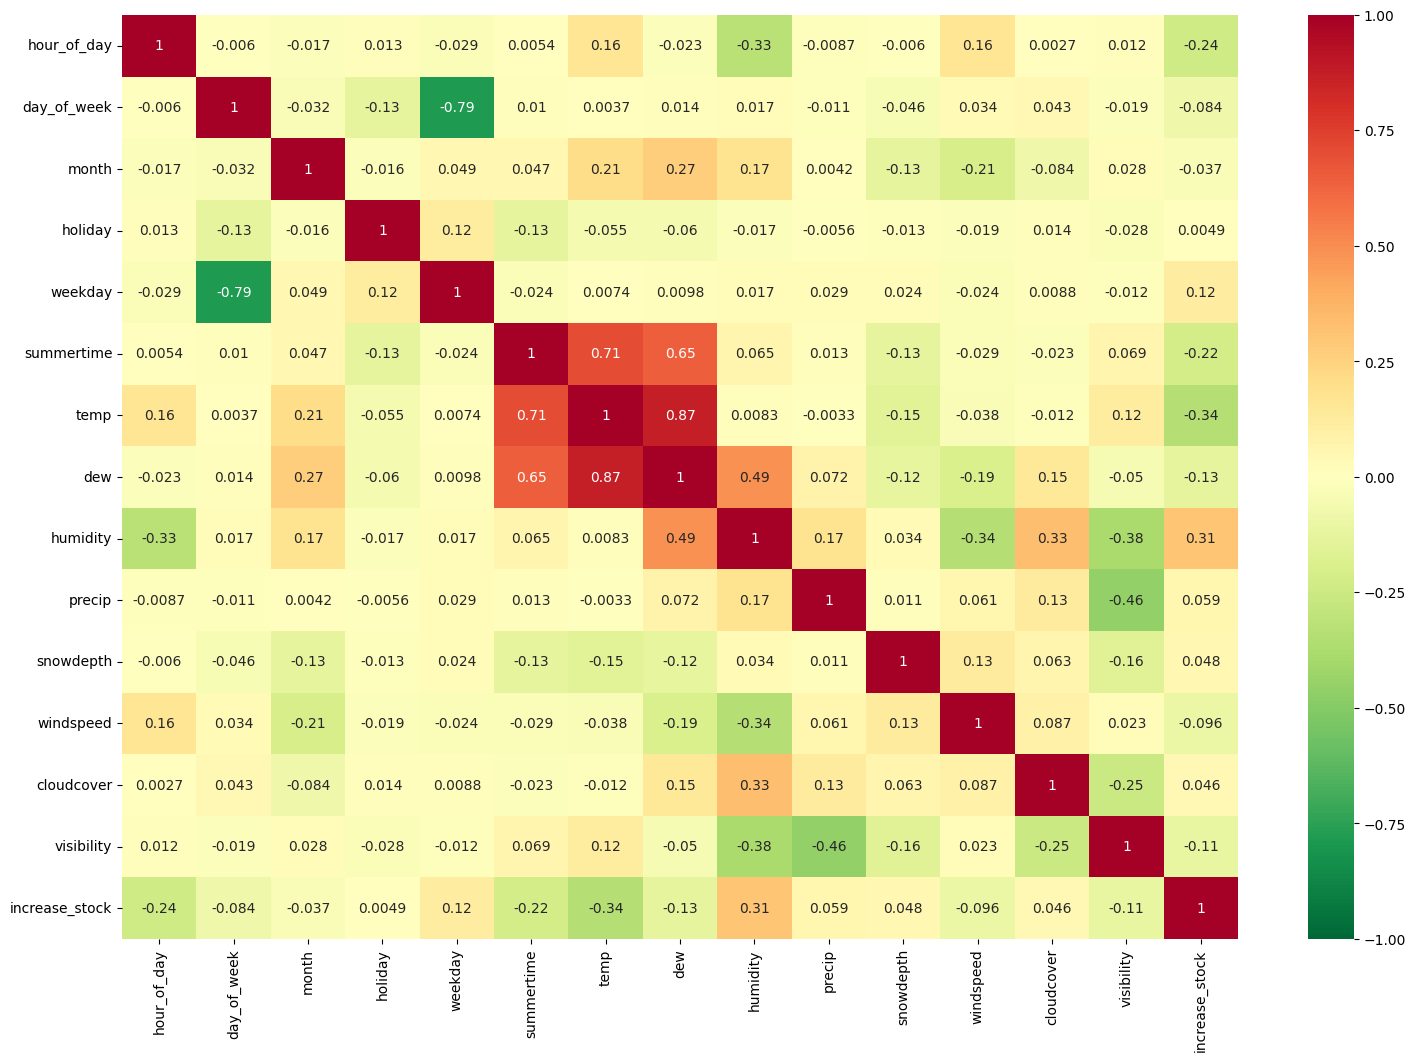

In [41]:
plt.figure(figsize=(18, 12))   # width=18, height=12
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, cmap="RdYlGn_r")
plt.show()

In [42]:
corrV = dataset.corr().loc['increase_stock'].abs().sort_values(ascending=False)
corrV

,increase_stock
increase_stock,1.000000
temp,0.336981
humidity,0.308726
hour_of_day,0.240544
summertime,0.216052
dew,0.132663
weekday,0.116446
visibility,0.113443
windspeed,0.096011
day_of_week,0.083688


#Model_Preparation&Training

In [43]:
df_model= dataset.copy()

In [44]:
cols_to_keep = corrV[abs(corrV) > 0.1].index.tolist()
df_model = df_model[cols_to_keep]

In [45]:
df_model.head(1)

,increase_stock,temp,humidity,hour_of_day,summertime,dew,weekday,visibility
0,1,-7.2,53.68,5,0,-15.0,0,16.0


In [46]:
y_new = df_model.iloc[:, 0].values     # first column
X_new = df_model.iloc[:, 1:].values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [48]:
X_train

array([[ 15. ,   1. ,   4. , ...,  18.2,  24.4,  16. ],
       [  0. ,   0. ,   7. , ...,   9.9,  24.4,  16. ],
       [ 19. ,   2. ,  10. , ...,   7.3,  81.3,  16. ],
       ...,
       [  7. ,   2. ,   9. , ...,   9. ,  58.9,  16. ],
       [ 11. ,   3. ,   3. , ...,  11.1, 100. ,  15.7],
       [  7. ,   0. ,   5. , ...,  25.3,  88.9,  16. ]])

In [49]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.20, random_state = 1)

In [50]:
y_new_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 29  21]
 [ 14 256]]


0.890625

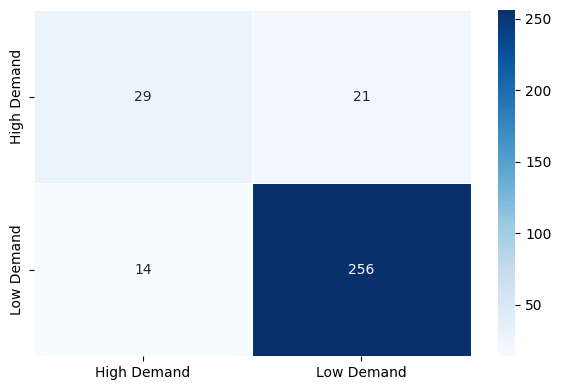

In [76]:
class_labels = ['High Demand', 'Low Demand']

plt.figure(figsize=(6, 4))

sns.heatmap(
    cm,
    annot=True,              # Show the actual numbers in each cell
    fmt='d',                 # Format the numbers as integers
    cmap='Blues',            # Use a color map (e.g., 'Blues', 'YlGnBu')
    xticklabels=class_labels, # Set labels for predicted classes
    yticklabels=class_labels, # Set labels for actual classes
    linewidths=.5,           # Add lines between cells for clarity
    cbar=True                # Display the color bar
)

plt.tight_layout() # Adjust plot to fit all elements
plt.show()

In [77]:
from sklearn.metrics import classification_report
target_names = ['High Demand', 'Low Demand']
print("--- Classification Report ---")
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

--- Classification Report ---
              precision    recall  f1-score   support

 High Demand       0.67      0.58      0.62        50
  Low Demand       0.92      0.95      0.94       270

    accuracy                           0.89       320
   macro avg       0.80      0.76      0.78       320
weighted avg       0.89      0.89      0.89       320



#Logistic_model with eliminated_features

In [78]:

from sklearn.linear_model import LogisticRegression
classifier_new = LogisticRegression(solver='lbfgs',
    C=1,
    penalty='l2',
    class_weight=None,
    max_iter=1000)
classifier_new.fit(X_new_train, y_new_train)

LogisticRegression(C=1, max_iter=1000)

#logistic_new_model with eliminated features

In [79]:
y_pred_new = classifier_new.predict(X_new_test)
cm_new = confusion_matrix(y_new_test, y_pred_new)
print(cm_new)
accuracy_score(y_new_test, y_pred_new)

[[ 23  27]
 [ 18 252]]


0.859375

##logistic_new Heatmap with eliminated Features

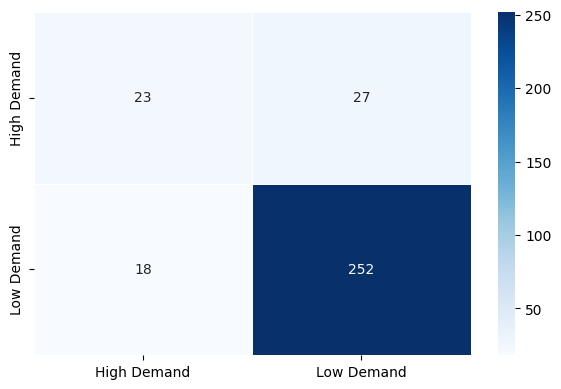

In [80]:

class_labels = ['High Demand', 'Low Demand']

plt.figure(figsize=(6, 4))

sns.heatmap(
    cm_new,
    annot=True,              # Show the actual numbers in each cell
    fmt='d',                 # Format the numbers as integers
    cmap='Blues',            # Use a color map (e.g., 'Blues', 'YlGnBu')
    xticklabels=class_labels, # Set labels for predicted classes
    yticklabels=class_labels, # Set labels for actual classes
    linewidths=.5,           # Add lines between cells for clarity
    cbar=True                # Display the color bar
)

plt.tight_layout() # Adjust plot to fit all elements
plt.show()

In [81]:
target_names = ['High Demand', 'Low Demand']
print("--- Classification Report ---")
report = classification_report(y_new_test, y_pred_new, target_names=target_names)
print(report)

--- Classification Report ---
              precision    recall  f1-score   support

 High Demand       0.56      0.46      0.51        50
  Low Demand       0.90      0.93      0.92       270

    accuracy                           0.86       320
   macro avg       0.73      0.70      0.71       320
weighted avg       0.85      0.86      0.85       320



#Hyperparameter Tuning Using Gridsearch

In [58]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
param_grid = [{'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'class_weight': [None, 'balanced']
   }, {
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'class_weight': [None, 'balanced']
}]

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='recall_macro', cv=5)
grid_search.fit(X_train, y_train)

grid_search2 = GridSearchCV(LogisticRegression(), param_grid, scoring='recall_macro', cv=5)
grid_search2.fit(X_new_train, y_new_train)

best_params = grid_search.best_params_
best_params2 = grid_search2.best_params_

print("Best hyperparameters:", best_params)
print("Best hyperparameters:", best_params2)

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best hyperparameters: {'class_weight': 'balanced', 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}


Accuracy: 0.746875


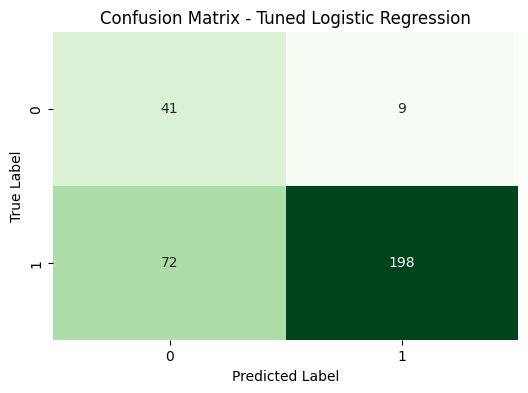

In [59]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Accuracy:", accuracy_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tuned, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#for eliminated_features

Accuracy: 0.715625


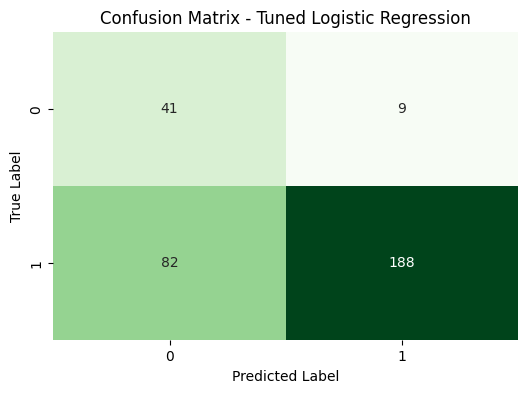

In [60]:
best_model2 = grid_search2.best_estimator_
y_pred_tuned2 = best_model2.predict(X_new_test)

accuracy_tuned2 = accuracy_score(y_new_test, y_pred_tuned2)
conf_matrix_tuned2 = confusion_matrix(y_new_test, y_pred_tuned2)

print("Accuracy:", accuracy_tuned2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tuned2, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Hyperparameter Tuning using RandomizedSearchCV

In [61]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
warnings.filterwarnings('ignore')
random_state = 42
param_grid_rand = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': loguniform(1e-5, 100),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': [None, 0.1, 0.3, 0.5, 0.7, 1.0]
}
rs = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_grid_rand,
    n_iter=20,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=False,
    random_state=random_state
)


rs.fit(X_train, y_train)

best_params = rs.best_params_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': np.float64(61.56997328235202), 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy: 0.8875


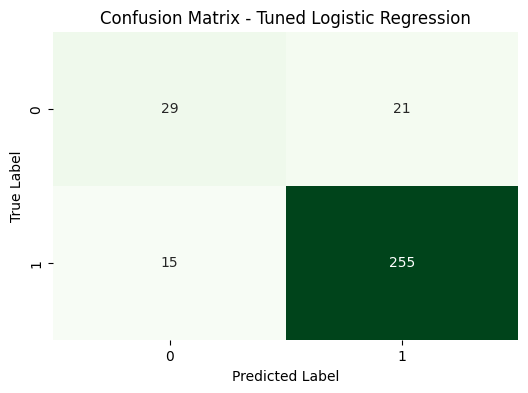

In [62]:
best_model2 = rs.best_estimator_
y_pred_tuned = best_model2.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Accuracy:", accuracy_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tuned, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Optimization Using bayesSearchCV

In [63]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.6 MB/s eta 0:00:00


In [64]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

In [65]:
search_space = {
    "solver": Categorical(['liblinear']),
    "penalty": Categorical(['l1', 'l2']),
    "fit_intercept": Categorical([True, False]),
}

bayes_search = BayesSearchCV(
    estimator=classifier,           # The model to tune
    search_spaces=search_space,         # The hyperparameter search space
    n_iter=20,                          # Total number of optimization iterations (our budget)
    cv=5,                               # Number of cross-validation folds
    scoring='accuracy',                 # The evaluation metric
    n_jobs=-1,                          # Use all available cores
    verbose=1,                          # Controls output verbosity
    random_state=42
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_

print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Accuracy: 0.884375


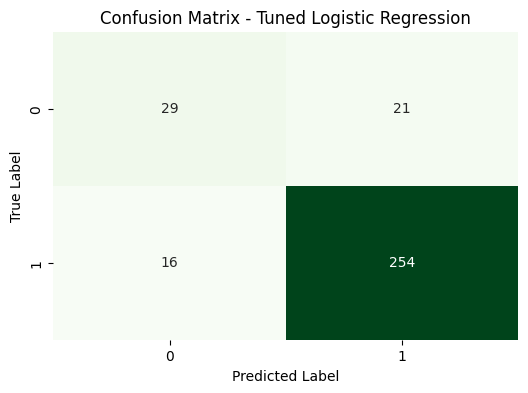

In [66]:
best_model3 = bayes_search.best_estimator_
y_pred_tuned = best_model3.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Accuracy:", accuracy_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tuned, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
k=np.arange(1,50)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param, cv=5, scoring='accuracy')
model_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [83]:
model_grid.best_params_

{'n_neighbors': np.int64(34)}

In [84]:
knn_model= KNeighborsClassifier(n_neighbors=30, metric='minkowski')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [85]:
y_pred_KNN = knn_model.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
accuracy_score(y_test, y_pred_KNN)

[[ 27  23]
 [ 18 252]]


0.871875

In [86]:
from sklearn.metrics import classification_report
target_names = ['High Demand', 'Low Demand']
print("--- Classification Report ---")
report = classification_report(y_test, y_pred_KNN, target_names=target_names)
print(report)

--- Classification Report ---
              precision    recall  f1-score   support

 High Demand       0.60      0.54      0.57        50
  Low Demand       0.92      0.93      0.92       270

    accuracy                           0.87       320
   macro avg       0.76      0.74      0.75       320
weighted avg       0.87      0.87      0.87       320



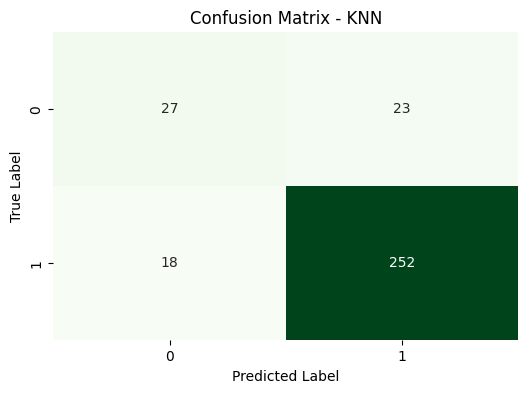

In [90]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_KNN, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#KNN with eliminated features

In [71]:
knn_model2= KNeighborsClassifier(n_neighbors=30, metric='minkowski')
knn_model2.fit(X_new_train, y_new_train)

KNeighborsClassifier(n_neighbors=30)

In [72]:
y_pred2 = knn_model2.predict(X_new_test)
cm2 = confusion_matrix(y_new_test, y_pred2)
print(cm2)
accuracy_score(y_new_test, y_pred2)

[[ 30  20]
 [ 27 243]]


0.853125